In [1]:
import json
import numpy as np
file_path = "/workspace/Data/Task09_Spleen/labelsTr/spleen_60_curve.mrk.json"
with open(file_path, 'r') as file:
    data = json.load(file)

coordinates_list = []
points = data.get('markups', [])[0].get('controlPoints', [])
for point in points:
    coordinates = point.get('position', [])
    coordinates_list.append(coordinates)

coordinates_world = np.array(coordinates_list)

coordinates_image = np.array([
    [198, 202, 78],
    [187, 178, 78],
    [157, 156, 78],
    [138, 137, 78],
    [81, 185, 78],
    [75, 264, 78],
    [94, 238, 78],
    [115, 206, 78],
    [150, 204, 78],
    [192, 208, 78],
])

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


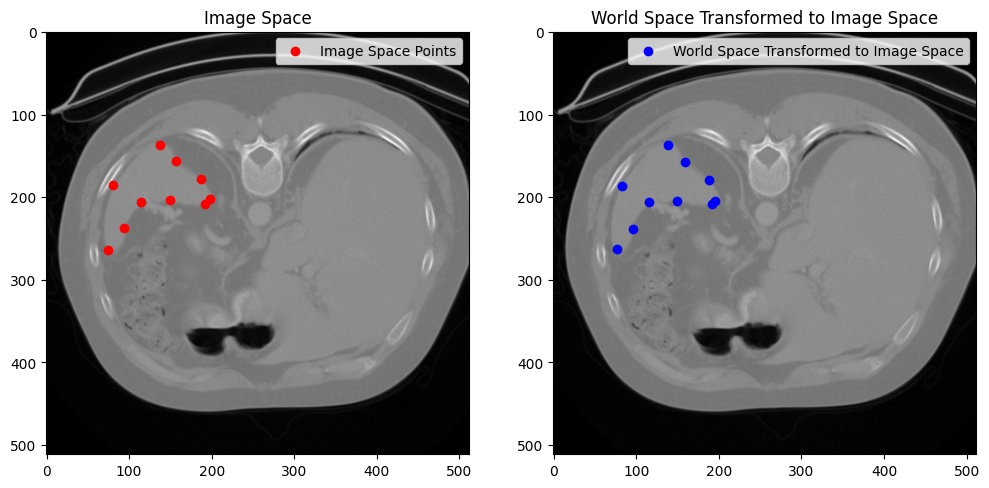

In [2]:
from monai.transforms import LoadImage
from monai.transforms.utility.dictionary import CoordinateTransformd
import matplotlib.pyplot as plt
import numpy as np

image_path = "/workspace/Data/Task09_Spleen/imagesTr/spleen_60.nii.gz"
image = LoadImage(image_only=True, reader="ITKReader")(image_path)


data = {
    "coordinates_image": coordinates_image,
    "coordinates_world": coordinates_world,
    "image": image,
}
image_to_world_matrix = image.affine
world_to_image_matrix = np.linalg.inv(image_to_world_matrix)

image_to_world_transform = CoordinateTransformd(keys="coordinates_image", refer_key="image", mode='image_to_world')
world_to_image_transform = CoordinateTransformd(keys="coordinates_world", refer_key="image", mode='world_to_image', affine_lps_to_ras=True)

world_points_transformed = image_to_world_transform(data)["coordinates_image"]
out = world_to_image_transform(data)
image_points_transformed = out["coordinates_world"]

# visualize the points
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(image[:, :, 78].T, cmap='gray')
ax[0].scatter(coordinates_image[:, 0], coordinates_image[:, 1], c='r', label='Image Space Points')
ax[0].set_title('Image Space')
ax[0].legend()

ax[1].imshow(image[:, :, 78].T, cmap='gray')
ax[1].scatter(image_points_transformed[:, 0], image_points_transformed[:, 1], c='b', label='World Space Transformed to Image Space')
ax[1].set_title('World Space Transformed to Image Space')
ax[1].legend()

plt.show()

In [3]:
# invert it back to world space

out = world_to_image_transform.inverse(out)
print( coordinates_world - out["coordinates_world"] )

[[-2.84217094e-14 -2.84217094e-14  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -5.68434189e-14  0.00000000e+00]
 [-5.68434189e-14 -5.68434189e-14  0.00000000e+00]
 [ 0.00000000e+00 -5.68434189e-14  0.00000000e+00]
 [ 0.00000000e+00 -2.84217094e-14  0.00000000e+00]
 [ 0.00000000e+00 -2.84217094e-14  0.00000000e+00]
 [ 0.00000000e+00 -5.68434189e-14  0.00000000e+00]
 [-5.68434189e-14 -5.68434189e-14  0.00000000e+00]
 [ 0.00000000e+00 -2.84217094e-14  0.00000000e+00]]
